<h1> VADER : Valence Aware Dictionary for Sentiment Reasoning </h1>
<h2> In this notebook, I'll be assigning a Polarity score to my data using NLTK Vader Library. </h2>
<h2> Vectorization and Word Embedding will also be considered. </h2>

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

In [2]:
##Import Dataset into Dataframe
#df=pd.read_csv("preprocessed_2_NOSW.csv")
#df

In [3]:
#drop missing rows or empty 
# Note:: emoty rows should have been removed when duplicates were removed
#df = df.dropna()
#df

In [4]:
#Import Dataset into Dataframe
df=pd.read_csv("preprocessed_2.csv")
df

,body,score,permalink
0,perhaps would would still biden outspoken crit...,1,take record appear capture trump
1,also fair trial republican witness testify roc...,1,take record appear capture trump
2,oil company pharmaceutical company willing pay...,1,senator want unilaterally release
3,okay click expect hear audio audio purpose rep...,1,take record appear capture trump
4,state treat house differently castle doctrine,1,organize breakandenter gang arrive tourist
...,...,...,...
13811,anti zionism inherently antisemitic define cri...,1,israel ambassador usa say radical leave college
13812,well lot right wing israeli jew one power diff...,4,israel ambassador usa say radical leave college
13813,read comment say anything two paragraph follow...,-3,fox friend warns muslim enclave west
13814,israel palestine debate give people socially a...,0,israel ambassador usa say radical leave college


In [5]:
df = df.dropna()
df

,body,score,permalink
0,perhaps would would still biden outspoken crit...,1,take record appear capture trump
1,also fair trial republican witness testify roc...,1,take record appear capture trump
2,oil company pharmaceutical company willing pay...,1,senator want unilaterally release
3,okay click expect hear audio audio purpose rep...,1,take record appear capture trump
4,state treat house differently castle doctrine,1,organize breakandenter gang arrive tourist
...,...,...,...
13811,anti zionism inherently antisemitic define cri...,1,israel ambassador usa say radical leave college
13812,well lot right wing israeli jew one power diff...,4,israel ambassador usa say radical leave college
13813,read comment say anything two paragraph follow...,-3,fox friend warns muslim enclave west
13814,israel palestine debate give people socially a...,0,israel ambassador usa say radical leave college


<h2> Task 1: Acquiring the sentiment score</h2>
<h3>    </h3>

In [6]:
import nltk
nltk.download('vader_lexicon')  #download NLTK wrapper for vader library

from nltk.sentiment.vader import SentimentIntensityAnalyzer
#  Import the downloaded NLTK-based VADER library
#   and acquire the sentiment score for available input or dataset

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\malik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
neu = ' the iphone seems decent'
pos = 'i love the new iphone'
neg = 'i hate the new iphone'
print(sid.polarity_scores(neu))
print(sid.polarity_scores(pos))
print(sid.polarity_scores(neg))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}


In [8]:
# Rename columns'score' -> 'vote' and 'permalink' -> 'topic' in dataframe
df.rename(columns={"score": "vote", "permalink": "topic", "body": "comment"}, inplace= True)
df.tail(1)

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,comment,vote,topic
13815,high school history enough go event lead trans...,3,brazil fearful lgbt community prepares


In [9]:
# Sneakpeak at distribution of topics in the dataframe
df['topic'].value_counts()

youtube ban supremacist content                  74
mueller report summary deliver congress          61
kim jong un want trump win former                59
eighth amendment effectively ban                 57
u join plastic waste agreement sign              54
                                                 ..
bad situation india                               1
venezuela humanitarian aid meet teargas           1
rapid loss biodiversity place global food         1
french force kill top alqaeda commander sahel     1
fox friend warns muslim enclave west              1
Name: topic, Length: 4742, dtype: int64

# Generate Vader Compound Score for "COMMENT"

In [10]:
df.shape

(13814, 3)

In [11]:
df['m_scores'] = df['comment'].apply(lambda review:sid.polarity_scores(review))

df['m_compound'] = df['m_scores'].apply(lambda d:d['compound'])

""" This syntax below says:
        comment scoring is +ve if compound score >0.09
        comment scoring is -ve if compound score <-0.09
        comment scoring is neutral otherwise
"""
df['m_comscore'] = df['m_compound'].apply(lambda score: 'pos' if score>0.09 else 'neg' if score<-0.09 else 'neu')

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
df.tail(20)

,comment,vote,topic,m_scores,m_compound,m_comscore
13796,let honest prolly know mean,4,u military deploy troop southern,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...",0.5106,pos
13797,yeah reese wholly owned subsidiary hershey lis...,3,court revive nestl child slavery lawsuit,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.2960,pos
13798,gon na back comment anything donald,-1,u military deploy troop southern,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
13799,muslim commit atrocity attribute ideology indi...,2,brazil fearful lgbt community prepares,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.2960,pos
13800,except actually know live brazil,1,jair bolsonaro elect president brazil,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
13801,except often actual criticism israel right bas...,1,israel ambassador usa say radical leave college,"{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'comp...",-0.7506,neg
13802,regular dude thing learn guy talk stuff learn ...,12,russian malware infects usa government computer,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.5719,pos
13803,tell name farmer right label,3,court revive nestl child slavery lawsuit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
13804,talk extreme group u antisemitic example sjp r...,20,israel ambassador usa say radical leave college,"{'neg': 0.346, 'neu': 0.573, 'pos': 0.08, 'com...",-0.8910,neg
13805,evidence every post positive china thread tend...,-6,china allow rhino horn tiger bone use,"{'neg': 0.265, 'neu': 0.623, 'pos': 0.112, 'co...",-0.5994,neg


<AxesSubplot:title={'center':'(a) Distribution of Comment setiment orientation'}, ylabel='m_comscore'>

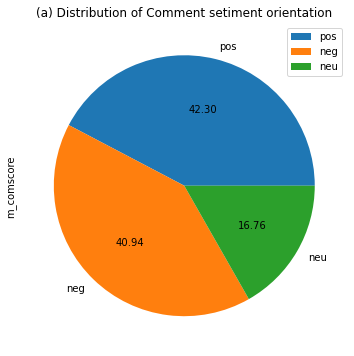

In [13]:
#Checking the distribution of the scoring
df['m_comscore'].value_counts().plot(kind='pie',autopct="%.2f",figsize=(6, 6),title='(a) Distribution of Comment setiment orientation', legend=True )


# Generate Vader Compound Score for "TOPIC"

In [14]:
df['t_scores'] = df['topic'].apply(lambda review:sid.polarity_scores(review))

df['t_compound'] = df['t_scores'].apply(lambda d:d['compound'])

df['t_comscore'] = df['t_compound'].apply(lambda score: 'pos' if score>0.09 else 'neg' if score<-0.09 else 'neu')


C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [15]:
df.head(10)

,comment,vote,topic,m_scores,m_compound,m_comscore,t_scores,t_compound,t_comscore
0,perhaps would would still biden outspoken crit...,1,take record appear capture trump,"{'neg': 0.068, 'neu': 0.747, 'pos': 0.185, 'co...",0.5574,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,also fair trial republican witness testify roc...,1,take record appear capture trump,"{'neg': 0.129, 'neu': 0.581, 'pos': 0.29, 'com...",0.3612,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,oil company pharmaceutical company willing pay...,1,senator want unilaterally release,"{'neg': 0.198, 'neu': 0.558, 'pos': 0.244, 'co...",0.2263,pos,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.0772,neu
3,okay click expect hear audio audio purpose rep...,1,take record appear capture trump,"{'neg': 0.288, 'neu': 0.56, 'pos': 0.152, 'com...",-0.4019,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,state treat house differently castle doctrine,1,organize breakandenter gang arrive tourist,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.4019,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
5,thats much work seem buzzfeed use make work le...,1,senator want unilaterally release,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.0772,neu
6,read record senate floor alright senator get i...,1,senator want unilaterally release,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.2500,pos,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.0772,neu
7,almost certainly suicide trauma body two girl ...,1,regime critic say saudis try kidnap,"{'neg': 0.144, 'neu': 0.714, 'pos': 0.143, 'co...",-0.2619,neg,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...",-0.2732,neg
8,guess probability young healthy people die inf...,1,coronavirus suspect case virus,"{'neg': 0.21, 'neu': 0.645, 'pos': 0.145, 'com...",-0.2960,neg,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",-0.2960,neg
9,well automatic weapon post hospital entrance i...,1,china coronavirus count artificially make low,"{'neg': 0.587, 'neu': 0.362, 'pos': 0.051, 'co...",-0.9648,neg,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...",-0.2732,neg


<AxesSubplot:title={'center':'(b) Distribution of Topic setiment orientation'}, ylabel='t_comscore'>

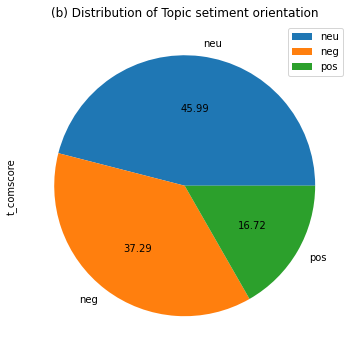

In [16]:
#Checking the distribution of the scoring
df['t_comscore'].value_counts().plot(kind='pie',autopct="%.2f",figsize=(6, 6),title='(b) Distribution of Topic setiment orientation', legend=True)

# or kind equals bar
#df['t_comscore'].value_counts().plot(kind='bar' )




In [17]:
#df.to_csv("vaderlysis_3.1.csv", index=False)

In [18]:
df.columns
df.drop(['m_scores', 't_scores'], axis=1, inplace=True)

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df.head(5)

,comment,vote,topic,m_compound,m_comscore,t_compound,t_comscore
0,perhaps would would still biden outspoken crit...,1,take record appear capture trump,0.5574,pos,0.0000,neu
1,also fair trial republican witness testify roc...,1,take record appear capture trump,0.3612,pos,0.0000,neu
2,oil company pharmaceutical company willing pay...,1,senator want unilaterally release,0.2263,pos,0.0772,neu
3,okay click expect hear audio audio purpose rep...,1,take record appear capture trump,-0.4019,neg,0.0000,neu
4,state treat house differently castle doctrine,1,organize breakandenter gang arrive tourist,0.4019,pos,0.0000,neu


<h2> Use scikit learn to create one-hot-encoding for m_comscore  & t_comscore features  </h2>

<h3> After some consideration i have decided to drop the 'vote' column as it has little effect in determining the sentiment of our comments </h3>
<h3> But if considered it would be important to normalize it </h3>

In [20]:
df.columns
df.drop(['m_compound', 't_compound', 'vote'], axis=1, inplace=True)

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
df.rename(columns={"m_comscore": "m_score", "t_comscore": "t_score"}, inplace= True)
df

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,comment,topic,m_score,t_score
0,perhaps would would still biden outspoken crit...,take record appear capture trump,pos,neu
1,also fair trial republican witness testify roc...,take record appear capture trump,pos,neu
2,oil company pharmaceutical company willing pay...,senator want unilaterally release,pos,neu
3,okay click expect hear audio audio purpose rep...,take record appear capture trump,neg,neu
4,state treat house differently castle doctrine,organize breakandenter gang arrive tourist,pos,neu
...,...,...,...,...
13811,anti zionism inherently antisemitic define cri...,israel ambassador usa say radical leave college,neg,neu
13812,well lot right wing israeli jew one power diff...,israel ambassador usa say radical leave college,neg,neu
13813,read comment say anything two paragraph follow...,fox friend warns muslim enclave west,neg,pos
13814,israel palestine debate give people socially a...,israel ambassador usa say radical leave college,neg,neu


In [22]:
#Store cleaned and Scored Data in CSV
df.to_csv("vader_result_3.2.csv", index=False)

# ...

<h1> End... </h1>